In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "../")
import trimesh
import numpy as np
from nara.processing.surface import TextureProjector3d

frame = 200
person = "377"
uv_fpath = "../data/uv_table.npy"
mesh_fpath = f"/home/group-cvg/datasets/easymocap/meshes/{person}/%06d.obj" % frame

mesh = trimesh.load(mesh_fpath, process=False)

V = mesh.vertices
F = mesh.faces
T = np.load(uv_fpath)

# 13776
# 13776
print("F", F.shape, V.shape, np.min(F), np.max(F))

samples = np.array([
    [1, 0], [0.5, 0.5], [0.6, 0.4]
], dtype=np.float32)

proj = TextureProjector3d(T, F=F)

# proj.query(samples)

F (13776, 3) (6890, 3) 0 6889


In [8]:
# pts3d = proj.query3d(pts, V)
from time import time

_start = time()
P, P_uv = proj.random_sample(n_samples=50000, V=V)
print("elapsed", time()-_start)

print('P_uv', P_uv.shape, np.min(P_uv), np.max(P_uv))

elapsed 0.03093719482421875
P_uv (50000, 2) 0.02050481057648237 0.9944919129327732


<IPython.core.display.Javascript object>


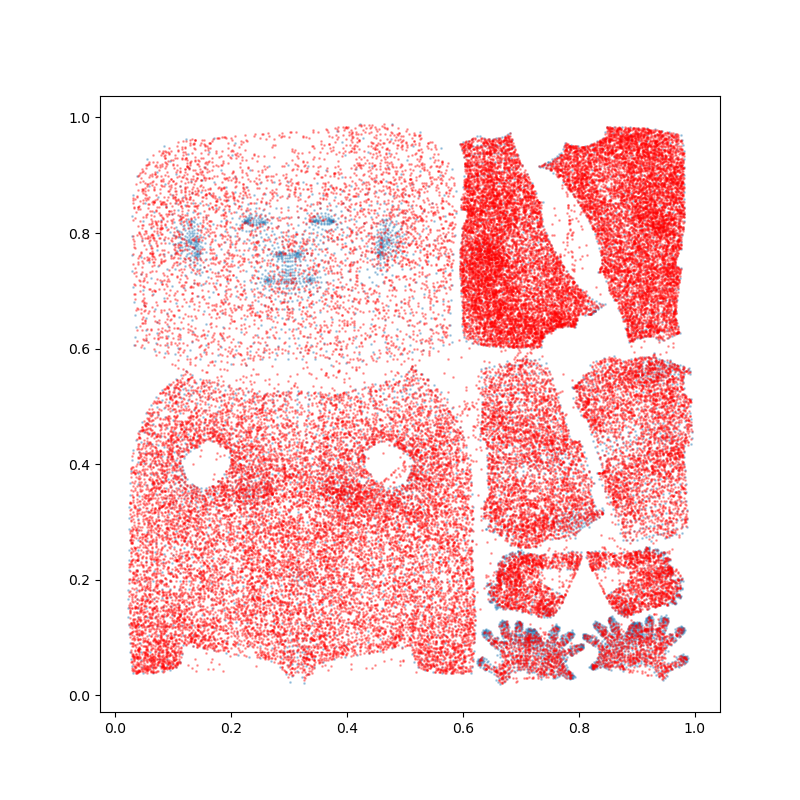

In [9]:


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(T[:, 0], T[:, 1], alpha=0.3, s=1)

ax.scatter(P_uv[:, 0], P_uv[:, 1], alpha=0.3, s=1, color='red')



plt.show()

<IPython.core.display.Javascript object>


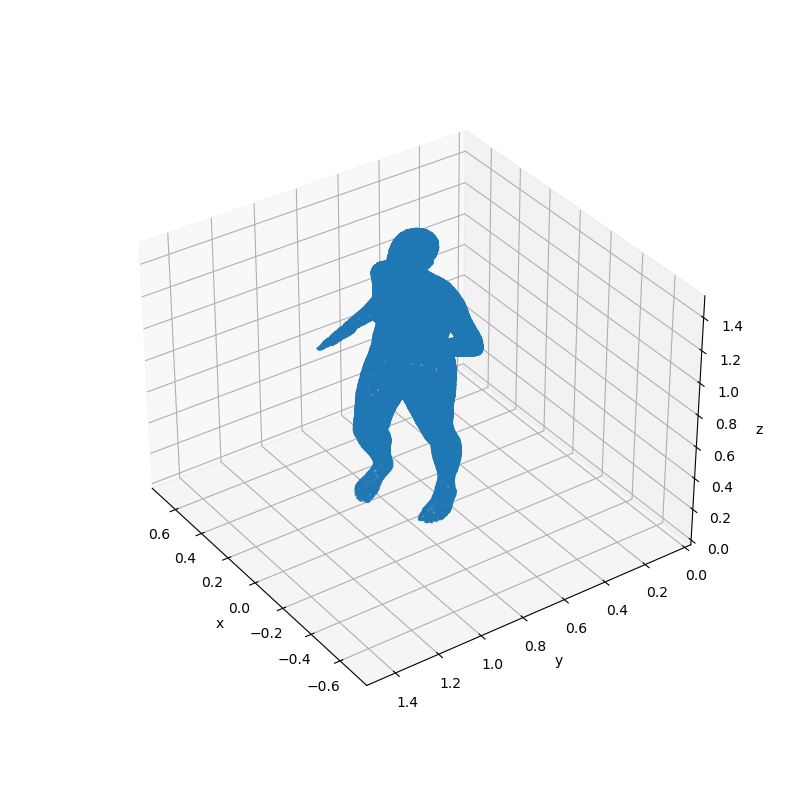

In [10]:
# pts3d = proj.query3d(pts, V)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(P[:, 0], P[:, 1], P[:, 2], s=1)

ax.set_xlim([-0.75, 0.75])
ax.set_ylim([0, 1.5])
ax.set_zlim([0, 1.5])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()